In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
import seaborn as sns
from dateutil import parser
import statsmodels.api as sm
from datetime import datetime

In [2]:
os.chdir('Monthly Permits by Metro')
permit_data = pd.read_csv('Population_and_Permits_by_metro_(Exact+Fuzzy_match).csv')

In [3]:
permit_data = permit_data[permit_data['Match on']!='None'].reset_index(drop=True)
permit_data_one_hot = pd.get_dummies(permit_data, columns=['month','year'])


permit_data['Date'] = [f'{permit_data.year[x]}-{permit_data.month[x]}-01' for x in range(len(permit_data))]
permit_data['Date'] = permit_data['Date'].apply(parser.parse)

In [4]:
permit_data

,CSA,CBSA,Name,Total,1 Unit,2 Units,3 & 4 Units,5 or more,Number of structures with 5 units or more,Monthly Coverage Percent,month,year,population_est,Match on,fuzzy match name,Date
0,999,10180,"Abilene, TX",28,28,0,0,0,0,96,1,2014,168342.0,Exact,NaN,2014-01-01
1,184,10420,"Akron, OH",26,26,0,0,0,0,75,1,2014,704908.0,Exact,NaN,2014-01-01
2,999,10500,"Albany, GA",17,15,2,0,0,0,93,1,2014,151949.0,Exact,NaN,2014-01-01
3,104,10580,"Albany Schenectady Troy, NY",63,53,0,0,10,2,65,1,2014,878113.0,Exact,NaN,2014-01-01
4,106,10740,"Albuquerque, NM",321,116,0,7,198,4,100,1,2014,904538.0,Exact,NaN,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25223,518,17660,"Coeur dAlene, ID",181,145,0,0,36,2,91,6,2019,165697.0,Fuzzy,"Coeur d'Alene, ID",2019-06-01
25224,518,17660,"Coeur dAlene, ID",178,132,2,0,44,2,91,7,2019,165697.0,Fuzzy,"Coeur d'Alene, ID",2019-07-01
25225,518,17660,"Coeur dAlene, ID",180,113,12,0,55,3,91,8,2019,165697.0,Fuzzy,"Coeur d'Alene, ID",2019-08-01
25226,518,17660,"Coeur dAlene, ID",178,124,2,0,52,2,91,9,2019,165697.0,Fuzzy,"Coeur d'Alene, ID",2019-09-01


C:\Users\robby\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Coverage Percent', ylabel='Density'>

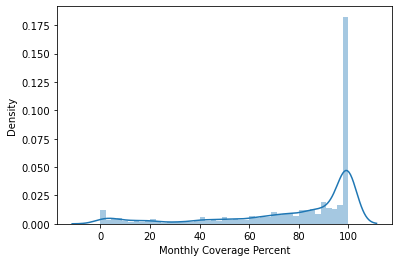

In [5]:
sns.distplot(permit_data['Monthly Coverage Percent'])

In [6]:
y = permit_data_one_hot.dropna()['1 Unit']
X = permit_data_one_hot.dropna()[['Monthly Coverage Percent','population_est']]
#                           ,'month_1', 'month_2', 'month_3', 'month_4',
#        'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
#        'month_11', 'month_12', 'year_2014', 'year_2015', 'year_2016',
#        'year_2017', 'year_2018', 'year_2019']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 1 Unit   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     906.6
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          1.80e-268
Time:                        10:15:47   Log-Likelihood:                -12258.
No. Observations:                1698   AIC:                         2.452e+04
Df Residuals:                    1695   BIC:                         2.454e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [7]:
y = permit_data_one_hot.dropna()['5 or more']
X = permit_data_one_hot.dropna()[['Monthly Coverage Percent','population_est']]
#                           ,'month_1', 'month_2', 'month_3', 'month_4',
#        'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
#        'month_11', 'month_12', 'year_2014', 'year_2015', 'year_2016',
#        'year_2017', 'year_2018', 'year_2019']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              5 or more   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1152.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          1.26e-316
Time:                        10:15:47   Log-Likelihood:                -11769.
No. Observations:                1698   AIC:                         2.354e+04
Df Residuals:                    1695   BIC:                         2.356e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [8]:
permit_data.sort_values('population_est', ascending=False)

,CSA,CBSA,Name,Total,1 Unit,2 Units,3 & 4 Units,5 or more,Number of structures with 5 units or more,Monthly Coverage Percent,month,year,population_est,Match on,fuzzy match name,Date
9210,408,35620,"New York Newark Jersey City, NY NJ PA",2987,907,172,48,1860,96,99,4,2016,19334778.0,Exact,NaN,2016-04-01
8223,408,35620,"New York Newark Jersey City, NY NJ PA",1549,657,118,66,708,55,99,1,2016,19334778.0,Exact,NaN,2016-01-01
11842,408,35620,"New York Newark Jersey City, NY NJ PA",4709,757,118,75,3759,118,99,12,2016,19334778.0,Exact,NaN,2016-12-01
10526,408,35620,"New York Newark Jersey City, NY NJ PA",4275,825,178,86,3186,97,99,8,2016,19334778.0,Exact,NaN,2016-08-01
8552,408,35620,"New York Newark Jersey City, NY NJ PA",3218,693,100,98,2327,80,99,2,2016,19334778.0,Exact,NaN,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22633,350,31140,"Louisville Jefferson County, KY IN",514,279,2,3,230,9,100,8,2019,NaN,Exact,NaN,2019-08-01
22911,999,22220,"Fayetteville Springdale Rogers, AR MO",370,333,6,0,31,3,100,9,2019,NaN,Exact,NaN,2019-09-01
23000,350,31140,"Louisville Jefferson County, KY IN",545,255,0,8,282,13,100,9,2019,NaN,Exact,NaN,2019-09-01
23278,999,22220,"Fayetteville Springdale Rogers, AR MO",437,389,14,0,34,2,100,10,2019,NaN,Exact,NaN,2019-10-01


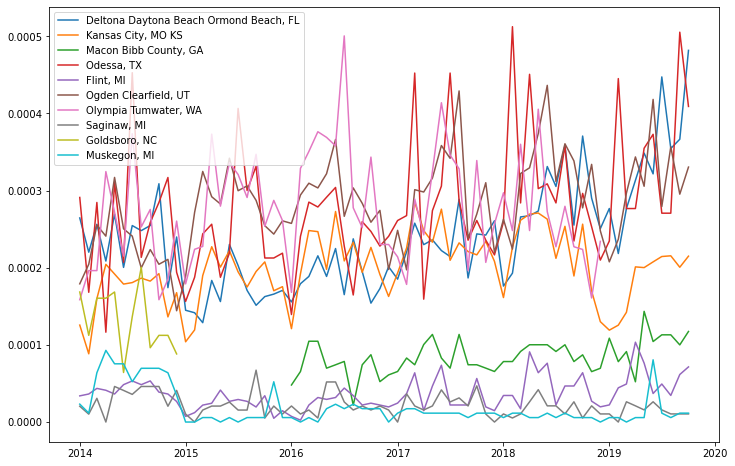

In [9]:
plt.figure(figsize=(12,8))
list_of_metros = list(set(permit_data.Name))
metros_to_look_at = random.sample(list_of_metros, 10)

for metro in metros_to_look_at:
    metro_df = permit_data[permit_data.Name == metro]
    plt.plot(list(metro_df.Date),list(metro_df['1 Unit']/metro_df['population_est']),label=metro)
plt.legend()

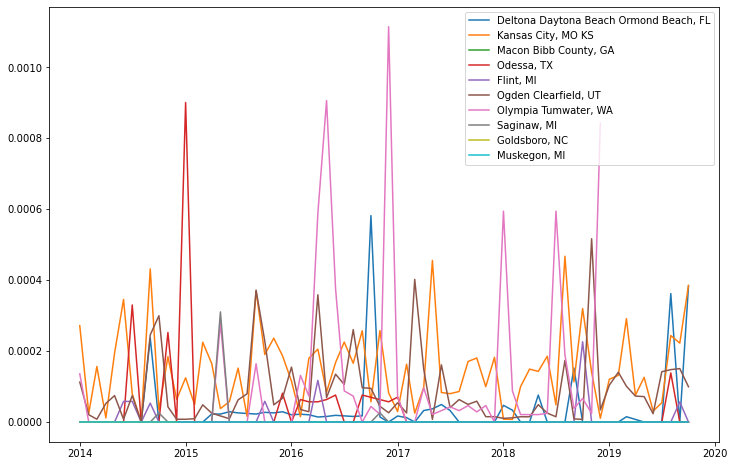

In [10]:
plt.figure(figsize=(12,8))
for metro in metros_to_look_at:
    metro_df = permit_data[permit_data.Name == metro]
    plt.plot(list(metro_df.Date),list(metro_df['5 or more']/metro_df['population_est']),label=metro)
plt.legend()

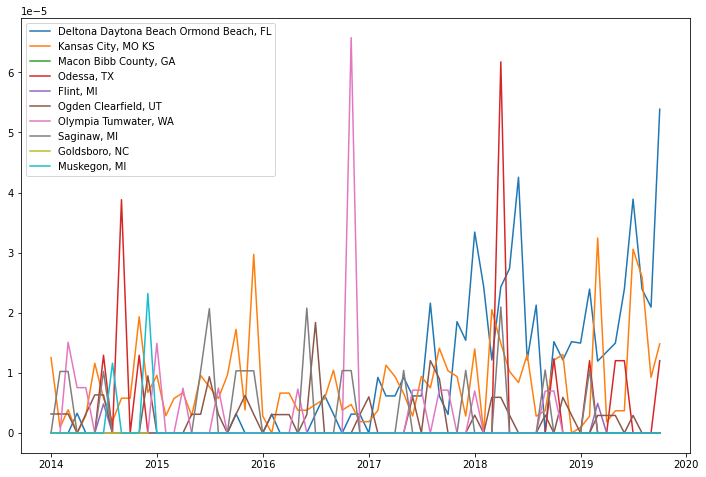

In [11]:
plt.figure(figsize=(12,8))
for metro in metros_to_look_at:
    metro_df = permit_data[permit_data.Name == metro]
    plt.plot(list(metro_df.Date),list(metro_df['2 Units']/metro_df['population_est']),label=metro)
plt.legend()